## IFT870 - TP1 
### gibg2501 - leba3207

In [43]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import scipy as sp
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown as md

# removes maximum number of columns & rows for display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

tp1_data_file = 'TP1_data.csv'
tp1_data = pd.read_csv(tp1_data_file, header=0, index_col=0)
tp1_data

,attribut1,attribut2,attribut3,attribut4,classe
id1,38.0,33.0,10.0,19.0,0
id2,38.2,23.4,17.0,16.6,0
id3,33.0,24.0,19.0,23.0,0
id4,31.0,21.0,29.0,16.0,0
id5,37.0,27.0,24.0,12.0,0
id6,46.7,23.3,11.1,18.9,0
id7,36.0,18.0,29.0,12.0,0
id8,40.7,28.9,10.7,17.4,0
id9,37.4,32.6,11.0,14.7,0
id10,47.0,28.0,9.0,16.0,0


Description des données statistiques de base du jeux de données

In [44]:
tp1_data.describe()

,attribut1,attribut2,attribut3,attribut4,classe
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,49.793220,23.486441,9.594915,14.557627,0.915254
std,10.490782,3.531995,8.174992,4.057994,0.815542
min,28.700000,16.500000,0.000000,3.700000,0.000000
25%,40.850000,21.050000,2.400000,12.000000,0.000000
50%,49.000000,23.300000,9.000000,15.100000,1.000000
75%,59.200000,25.100000,13.000000,16.950000,2.000000
max,68.500000,33.000000,29.100000,23.000000,2.000000


Affichage des attributs du jeux de données paire à paire

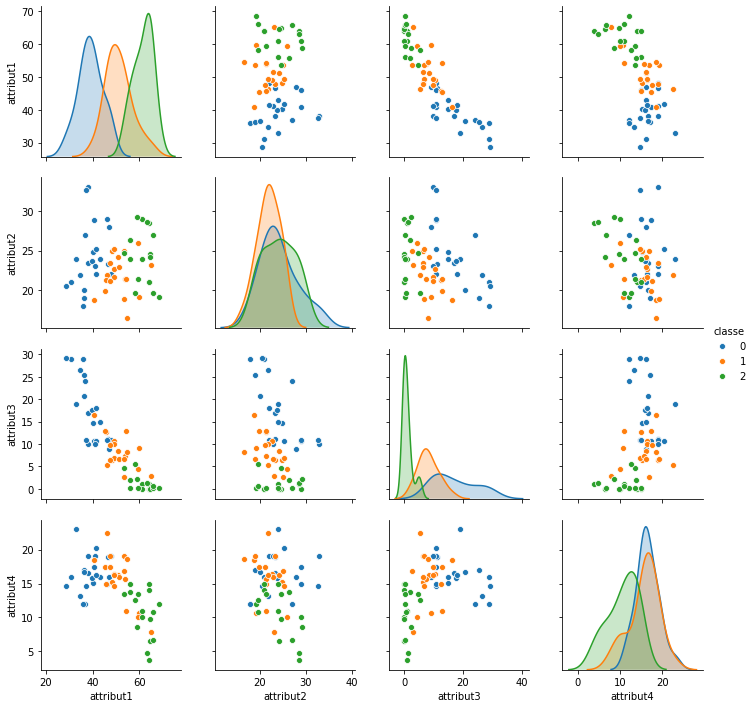

In [45]:
%matplotlib inline
sns.pairplot(tp1_data, vars=['attribut1', 'attribut2', 'attribut3', 'attribut4'],  hue='classe')

Utilisation de la méthode de réduction en composantes principales ($$\textit{PCA}$$) pour quantifier les corrélations entre les attributs pour chaque classe

In [46]:
scaler = StandardScaler()

condition0 = tp1_data['classe'] == 0
condition1 = tp1_data['classe'] == 1
condition2 = tp1_data['classe'] == 2

df_tp1_data_classe_0 = tp1_data.loc[condition0 , 'attribut1':'attribut4']
df_tp1_data_classe_1 = tp1_data.loc[condition1 , 'attribut1':'attribut4']
df_tp1_data_classe_2 = tp1_data.loc[condition2 , 'attribut1':'attribut4']

scaler.fit(df_tp1_data_classe_0)
scaler.fit(df_tp1_data_classe_1)
scaler.fit(df_tp1_data_classe_2)

tp1_data_scaled0 = scaler.transform(df_tp1_data_classe_0) 
tp1_data_scaled1 = scaler.transform(df_tp1_data_classe_1) 
tp1_data_scaled2 = scaler.transform(df_tp1_data_classe_2) 

covar_matrix0 = PCA(n_components =  tp1_data_scaled0.shape[1])
covar_matrix1 = PCA(n_components =  tp1_data_scaled1.shape[1])
covar_matrix2 = PCA(n_components =  tp1_data_scaled2.shape[1])

covar_matrix0.fit(tp1_data_scaled0)
covar_matrix1.fit(tp1_data_scaled1)
covar_matrix2.fit(tp1_data_scaled2)

variance0 = covar_matrix0.explained_variance_
variance1 = covar_matrix1.explained_variance_
variance2 = covar_matrix2.explained_variance_

md('Les variances pour les classes 0, 1 et 2 sont respectiviement: {}, {} et {}'.format(variance0, variance1, variance2))

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Les variances pour les classes 0, 1 et 2 sont respectiviement: [21.46115117  1.05774677  0.66043455  0.1098506 ], [6.0780502  1.83887938 0.57090685 0.03541321] et [1.98576056 1.57473332 0.62658147 0.06292465]

## Q1
a) Les relations de corrélations sont visiblement différentes pour les 3 classes. Par exemple, entre la covariance entre les    